In [41]:
import pandas as pd
import matplotlib.pyplot as plt
combined_df = pd.read_csv('..\\DATA\\combined_data.csv')


C:\Users\zaidf\AppData\Local\Temp\ipykernel_19996\3399434696.py:3: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv('..\\DATA\\combined_data.csv')


In [3]:
pd.set_option('display.max_columns', None)
combined_df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,199806,2,2050,199806,2,2100,2149256,5669115,MARYLAND,24.0,1998,June,Tornado,C,23,GARRETT,PBZ,02-JUN-98 20:50:00,EST,02-JUN-98 21:00:00,0,0,0,0,1M,NaN,NWS STORM SURVEY,NaN,NaN,NaN,NaN,F2,3.0,300.0,NaN,NaN,NaN,NaN,4.0,W,FRIENDSVILLE,3.0,SW,FRIENDSVILLE,39.67,-79.50,39.63,-79.45,An F2 tornado passed southeast through souther...,NaN,PDC
1,199806,2,2038,199806,2,2042,2149257,5669116,MARYLAND,24.0,1998,June,Tornado,C,23,GARRETT,PBZ,02-JUN-98 20:38:00,EST,02-JUN-98 20:42:00,0,0,0,0,.5M,NaN,NWS STORM SURVEY,2.0,NaN,NaN,NaN,F2,2.5,700.0,NaN,NaN,NaN,NaN,1.0,NW,FINZEL,2.0,SE,FINZEL,39.73,-78.97,39.70,-78.93,An F2 tornado passed through the town of Finze...,NaN,PDC
2,199806,13,1545,199806,13,1545,2149637,5668053,OKLAHOMA,40.0,1998,June,Tornado,C,11,BLAINE,OUN,13-JUN-98 15:45:00,CST,13-JUN-98 15:45:00,1,0,0,0,NaN,NaN,LAW ENFORCEMENT,NaN,NaN,NaN,NaN,F0,0.1,10.0,NaN,NaN,NaN,NaN,1.0,W,LONGDALE,1.0,W,LONGDALE,36.13,-98.57,36.13,-98.57,"Summary of events of June 13, 1998:During the ...",The Blaine County Sheriff reported a brief tor...,PDC
3,199806,2,2045,199806,2,2050,2149255,5669114,WEST VIRGINIA,54.0,1998,June,Tornado,C,77,PRESTON,PBZ,02-JUN-98 20:45:00,EST,02-JUN-98 20:50:00,0,0,0,0,5M,2M,NWS STORM SURVEY,NaN,NaN,NaN,NaN,F2,4.0,300.0,NaN,NaN,NaN,NaN,1.0,NW,GLADE FARMS,3.0,SE,GLADE FARMS,39.72,-79.55,39.67,-79.50,An F2 tornado passed southeast through souther...,NaN,PDC
4,199806,2,1720,199806,2,1728,2149234,5668877,PENNSYLVANIA,42.0,1998,June,Tornado,C,129,WESTMORELAND,PBZ,02-JUN-98 17:20:00,EST,02-JUN-98 17:28:00,0,0,0,0,NaN,NaN,NWS STORM SURVEY,NaN,NaN,NaN,NaN,F1,6.0,300.0,NaN,NaN,NaN,NaN,3.0,NW,IRWIN,3.0,SE,MANOR,40.37,-79.75,40.30,-79.63,An F1 tornado touched down 5 miles northwest o...,NaN,PDC


In [13]:
columns_need = [
    'BEGIN_YEARMONTH','BEGIN_DATE_TIME', 'YEAR', 'STATE', 'MONTH_NAME', 
    'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 
    'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 
    'TOR_F_SCALE', 'TOR_LENGTH', 'BEGIN_LON', 'BEGIN_LAT'
]
df = combined_df[columns_need]
df['INJURIES_TOTAL']=df['INJURIES_DIRECT']+df['INJURIES_INDIRECT']
df['DEATHS_TOTAL']=df['DEATHS_DIRECT']+df['DEATHS_INDIRECT']
df.head()

C:\Users\zaidf\AppData\Local\Temp\ipykernel_19996\793084218.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INJURIES_TOTAL']=df['INJURIES_DIRECT']+df['INJURIES_INDIRECT']
C:\Users\zaidf\AppData\Local\Temp\ipykernel_19996\793084218.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DEATHS_TOTAL']=df['DEATHS_DIRECT']+df['DEATHS_INDIRECT']


,BEGIN_YEARMONTH,BEGIN_DATE_TIME,YEAR,STATE,MONTH_NAME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,TOR_F_SCALE,TOR_LENGTH,BEGIN_LON,BEGIN_LAT,INJURIES_TOTAL,DEATHS_TOTAL
0,199806,02-JUN-98 20:50:00,1998,MARYLAND,June,0,0,0,0,1M,NaN,F2,3.0,-79.50,39.67,0,0
1,199806,02-JUN-98 20:38:00,1998,MARYLAND,June,0,0,0,0,.5M,NaN,F2,2.5,-78.97,39.73,0,0
2,199806,13-JUN-98 15:45:00,1998,OKLAHOMA,June,1,0,0,0,NaN,NaN,F0,0.1,-98.57,36.13,1,0
3,199806,02-JUN-98 20:45:00,1998,WEST VIRGINIA,June,0,0,0,0,5M,2M,F2,4.0,-79.55,39.72,0,0
4,199806,02-JUN-98 17:20:00,1998,PENNSYLVANIA,June,0,0,0,0,NaN,NaN,F1,6.0,-79.75,40.37,0,0


In [42]:
def convert_damage_to_millions(value):
    if isinstance(value, str):
        value = value.strip()  
        if value == '': 
            return None  
        if 'M' in value: 
            value = value.replace('M', '').strip()
            if value == '': 
                return None 
            return float(value) * 1_000_000
        elif 'K' in value:
            value = value.replace('K', '').strip()
            if value == '': 
                return None 
            return float(value) * 1_000
        else:
            try:
                return float(value)  
            except ValueError:
                return None 
    elif isinstance(value, (int, float)):
        return value
    else:
        return None  

df['DAMAGE_PROPERTY'] = df['DAMAGE_PROPERTY'].apply(convert_damage_to_millions)
df['DAMAGE_PROPERTY'] = df['DAMAGE_PROPERTY'].fillna(0)

AttributeError: 'Index' object has no attribute 'strftime'

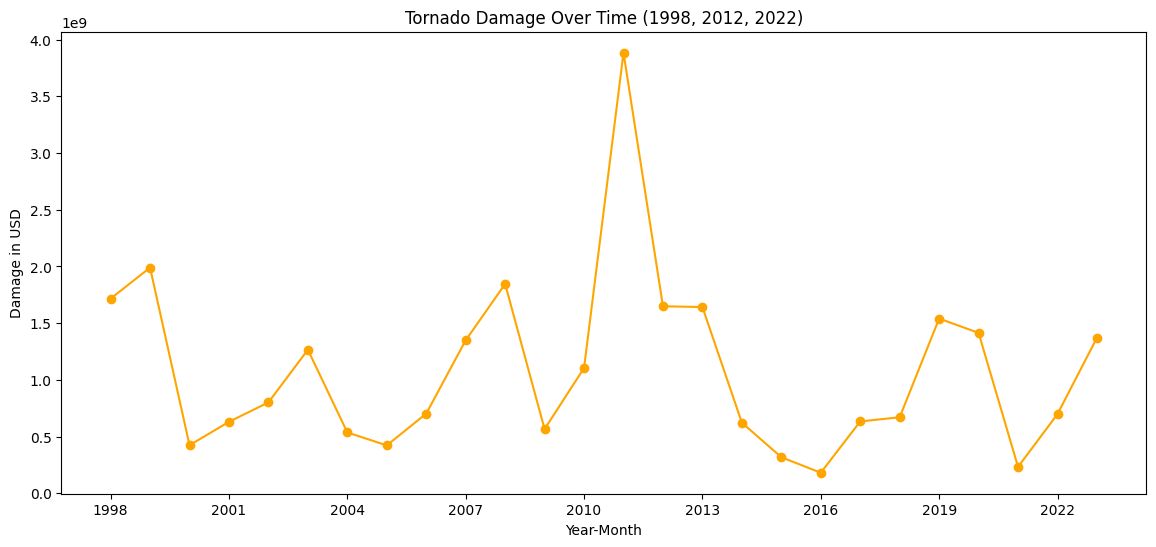

In [43]:
def plot_with_specific_years(x_values, y_values, title, xlabel, ylabel, color='blue'):
    plt.figure(figsize=(14, 6))  # Increase figure size to give more space
    plt.plot(x_values, y_values, marker='o', color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Set x-ticks for every third month
    ax = plt.gca()
    ax.set_xticks(x_values[::3])  # Show every third month to reduce clutter
    ax.set_xticklabels(x_values[::3].strftime('%Y-%m'), rotation=45)
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()


tornado_damage = df.groupby(df['YEAR'])['DAMAGE_PROPERTY'].sum()
plot_with_specific_years(tornado_damage.index, tornado_damage.values,
                         title='Tornado Damage Over Time',
                         xlabel='Year-Month', ylabel='Damage in USD', color='orange')

In [44]:
num_per_year  = df.groupby('YEAR').size().reset_index(name='NUM_TORNADOES')
num_per_year

,YEAR,NUM_TORNADOES
0,1998,1529
1,1999,1520
2,2000,1169
3,2001,1351
4,2002,1040
5,2003,1535
6,2004,1947
7,2005,1343
8,2006,1263
9,2007,1242


Slope: -0.5846153846153849
Intercept: 2583.292307692308
R-squared: 0.0002412552759276469
P-value: 0.9399687443213751


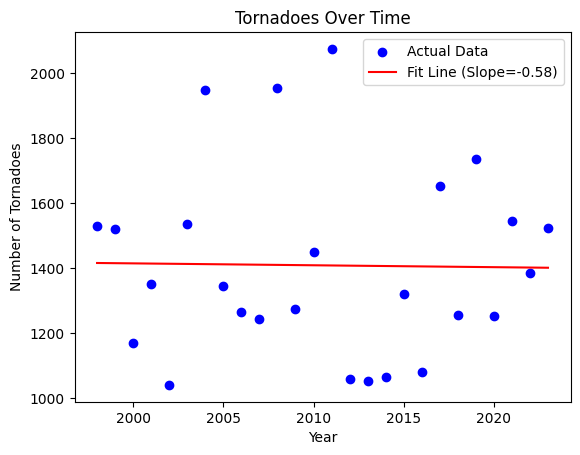

In [45]:
from scipy.stats import linregress
years = num_per_year['YEAR']
tornadoes = num_per_year['NUM_TORNADOES']

slope, intercept, r_value, p_value, std_err = linregress(years, tornadoes)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

plt.scatter(years, tornadoes, color='blue', label='Actual Data')
plt.plot(years, intercept + slope * years, 'r', label=f'Fit Line (Slope={slope:.2f})')
plt.xlabel('Year')
plt.ylabel('Number of Tornadoes')
plt.title('Tornadoes Over Time')
plt.legend()
plt.show()


Slope: -9820740.694017092
Intercept: 20829574613.398285
R-squared: 0.009091438710563943
P-value: 0.6431253407723168


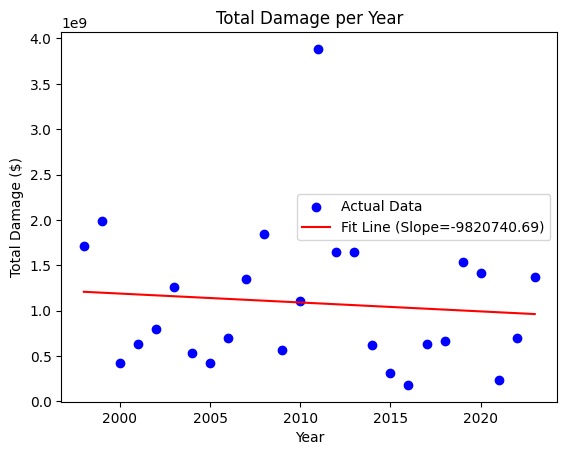

In [46]:
dam_per_year  = df.groupby('YEAR')['DAMAGE_PROPERTY'].sum().reset_index()
years = dam_per_year['YEAR']
total_damage = dam_per_year['DAMAGE_PROPERTY']

slope, intercept, r_value, p_value, std_err = linregress(years, total_damage)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

plt.scatter(years, total_damage, color='blue', label='Actual Data')
plt.plot(years, intercept + slope * years, 'r', label=f'Fit Line (Slope={slope:.2f})')
plt.xlabel('Year')
plt.ylabel('Total Damage ($)')
plt.title('Total Damage per Year')
plt.legend()
plt.show()

Slope: -5896.525391267438
Intercept: 12613239.959170062
R-squared: 0.009477870009827612
P-value: 0.636124545858886


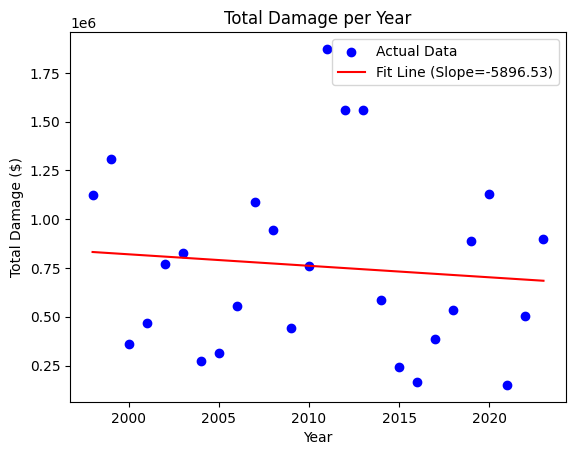

In [47]:
avg_dam_per_year  = df.groupby('YEAR')['DAMAGE_PROPERTY'].mean().reset_index()
years = avg_dam_per_year['YEAR']
total_damage = avg_dam_per_year['DAMAGE_PROPERTY']

slope, intercept, r_value, p_value, std_err = linregress(years, total_damage)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

plt.scatter(years, total_damage, color='blue', label='Actual Data')
plt.plot(years, intercept + slope * years, 'r', label=f'Fit Line (Slope={slope:.2f})')
plt.xlabel('Year')
plt.ylabel('Average Damage ($)')
plt.title('Average Damage per Year')
plt.legend()
plt.show()

Slope: -0.5955555555555555
Intercept: 1275.3644444444444
R-squared: 0.001891266056413572
P-value: 0.8329315778118441


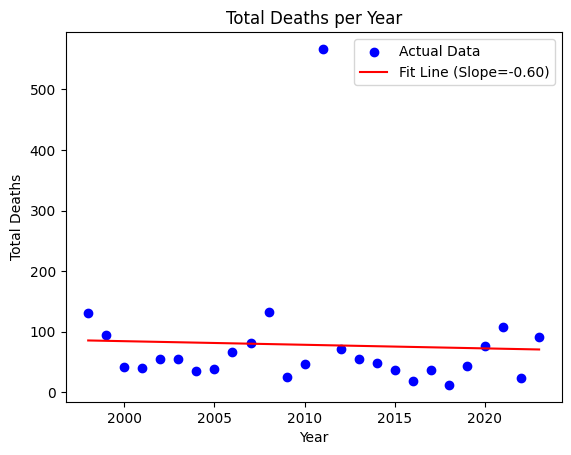

In [48]:
deaths_per_year  = df.groupby('YEAR')['DEATHS_TOTAL'].sum().reset_index()
years = deaths_per_year['YEAR']
total_deaths = deaths_per_year['DEATHS_TOTAL']

slope, intercept, r_value, p_value, std_err = linregress(years, total_deaths)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

plt.scatter(years, total_deaths, color='blue', label='Actual Data')
plt.plot(years, intercept + slope * years, 'r', label=f'Fit Line (Slope={slope:.2f})')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('Total Deaths per Year')
plt.legend()
plt.show()

Slope: -26.732991452991453
Intercept: 54750.52547008547
R-squared: 0.03853922845546724
P-value: 0.3364638343666011


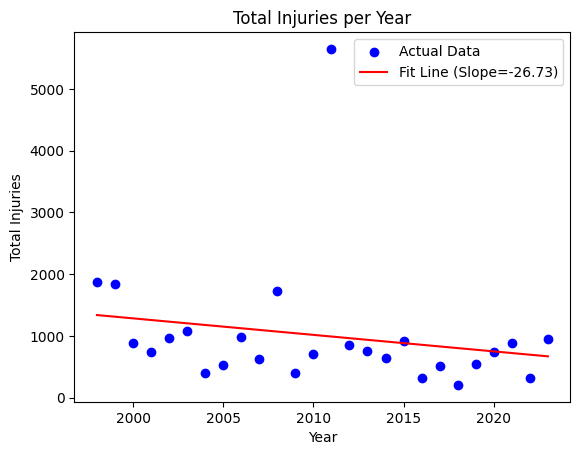

In [49]:
injuries_per_year  = df.groupby('YEAR')['INJURIES_TOTAL'].sum().reset_index()
years = injuries_per_year['YEAR']
total_injuries = injuries_per_year['INJURIES_TOTAL']

slope, intercept, r_value, p_value, std_err = linregress(years, total_injuries)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

plt.scatter(years, total_injuries, color='blue', label='Actual Data')
plt.plot(years, intercept + slope * years, 'r', label=f'Fit Line (Slope={slope:.2f})')
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.title('Total Injuries per Year')
plt.legend()
plt.show()

In [50]:
#injuries_per_year  = df.groupby('YEAR')['INJURIES_TOTAL'].sum().reset_index()
total_tornadoes = df.groupby('YEAR').size().reset_index(name='TOTAL_TORNADOES')
deadly_tornadoes = df[df['DEATHS_TOTAL'] > 1].groupby('YEAR').size().reset_index(name='NUMBER_OF_DEADLY_TORNADOES')
tornado_prop = pd.merge(total_tornadoes, deadly_tornadoes, on='YEAR', how='left')
tornado_prop

,YEAR,TOTAL_TORNADOES,NUMBER_OF_DEADLY_TORNADOES
0,1998,1529,17
1,1999,1520,14
2,2000,1169,5
3,2001,1351,11
4,2002,1040,14
5,2003,1535,12
6,2004,1947,5
7,2005,1343,5
8,2006,1263,10
9,2007,1242,13


In [51]:
df.TOR_F_SCALE.value_counts()

TOR_F_SCALE
EF0    11542
EF1     8197
F0      7933
F1      3320
EF2     2291
EFU     1097
F2      1048
EF3      614
F3       345
EF4      132
F4        68
EF5       14
F5         5
Name: count, dtype: int64

In [52]:

category_order = ['FU','F0', 'F1', 'F2', 'F3', 'F4', 'F5']
df['F_SCALE_SIMPLE'] = df['TOR_F_SCALE'].str[-2:]
df['F_SCALE_SIMPLE'] = pd.Categorical(df['F_SCALE_SIMPLE'], categories=category_order, ordered=True)

df.F_SCALE_SIMPLE.value_counts()

F_SCALE_SIMPLE
F0    19475
F1    11517
F2     3339
FU     1097
F3      959
F4      200
F5       19
Name: count, dtype: int64

In [53]:
f_scale_count = df.groupby(['YEAR', 'F_SCALE_SIMPLE']).size().reset_index(name='COUNT')
f_scale_pivot = df.pivot_table(index='YEAR', 
                                  columns='F_SCALE_SIMPLE', 
                                  aggfunc='size', 
                                  fill_value=0)

f_scale_pivot.reset_index(inplace=True)
f_scale_pivot.head()

F_SCALE_SIMPLE,YEAR,FU,F0,F1,F2,F3,F4,F5
0,1998,0,914,416,137,48,11,3
1,1999,0,888,381,164,69,16,2
2,2000,0,763,293,83,27,3,0
3,2001,0,866,324,122,31,8,0
4,2002,0,663,243,90,38,6,0


In [54]:
from scipy.stats import chi2_contingency # defining the table 

data = f_scale_pivot
stat, p, dof, expected = chi2_contingency(data) # interpret p-value 
alpha = 0.05 
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)')

print(f"chi2 statistic:     {stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

p value is 0.0
Dependent (reject H0)
chi2 statistic:     5974.8
p-value:            0
degrees of freedom: 175
expected frequencies:
[[2074.35807109   43.53243173  772.82963355  457.03100845  132.50208711
    38.056155      7.93663295    0.75398013]
 [2069.65297764   43.43369075  771.07668853  455.99436312  132.20154367
    37.96983539    7.91863095    0.75226994]
 [1863.80513957   39.11377266  694.38534412  410.64113008  119.05276837
    34.19335276    7.13104333    0.67744912]
 [1971.43415205   41.37247269  734.48396134  434.35439193  125.92769946
    36.16791368    7.54283914    0.71656972]
 [1789.11178119   37.54625952  666.557342    394.18438551  114.28164133
    32.82302906    6.84526154    0.65029985]
 [2080.82757457   43.66820059  775.23993294  458.45639577  132.91533433
    38.17484445    7.9613857     0.75633164]
 [2323.72802349   48.76570393  865.73571935  511.97321077  148.43088919
    42.63109396    8.89073909    0.84462021]
 [1969.08160533   41.3231022   733.60748883  433.

In [55]:
df['YEAR']=df['YEAR'].astype(int)
f_scale_count = df[df['YEAR']<2003].groupby(['YEAR', 'F_SCALE_SIMPLE']).size().reset_index(name='COUNT')
f_scale_first = df[df['YEAR']<2003].pivot_table(index='YEAR', 
                                  columns='F_SCALE_SIMPLE', 
                                  aggfunc='size', 
                                  fill_value=0)

f_scale_first.reset_index(inplace=True)
f_scale_first
combined_row = f_scale_first.sum(numeric_only=True).reset_index()
combined_row

,F_SCALE_SIMPLE,0
0,YEAR,10000
1,FU,0
2,F0,4094
3,F1,1657
4,F2,596
5,F3,213
6,F4,44
7,F5,5


In [56]:
first_5=combined_row
first_5= first_5[first_5[0] != 10000]
first_5.rename(columns={'F_SCALE_SIMPLE': 'F_SCALE', 0: 'First_5_Count'}, inplace=True)
FCOUNT=first_5
first_5

C:\Users\zaidf\AppData\Local\Temp\ipykernel_19996\2131578314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_5.rename(columns={'F_SCALE_SIMPLE': 'F_SCALE', 0: 'First_5_Count'}, inplace=True)


,F_SCALE,First_5_Count
1,FU,0
2,F0,4094
3,F1,1657
4,F2,596
5,F3,213
6,F4,44
7,F5,5


In [57]:
df['YEAR']=df['YEAR'].astype(int)
f_scale_count = df[df['YEAR']>2018].groupby(['YEAR', 'F_SCALE_SIMPLE']).size().reset_index(name='COUNT')
f_scale_first = df[df['YEAR']<2018].pivot_table(index='YEAR', 
                                  columns='F_SCALE_SIMPLE', 
                                  aggfunc='size', 
                                  fill_value=0)

f_scale_first.reset_index(inplace=True)
combined_row1 = f_scale_first.sum(numeric_only=True).reset_index()
last_5=combined_row1
last_5= last_5[last_5[0] != 40150]
last_5.rename(columns={'F_SCALE_SIMPLE': 'F_SCALE', 0: 'Last_5_Count'}, inplace=True)
last_5

C:\Users\zaidf\AppData\Local\Temp\ipykernel_19996\4093109911.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_5.rename(columns={'F_SCALE_SIMPLE': 'F_SCALE', 0: 'Last_5_Count'}, inplace=True)


,F_SCALE,Last_5_Count
1,FU,99
2,F0,15909
3,F1,8389
4,F2,2547
5,F3,782
6,F4,171
7,F5,19


In [58]:
FCOUNT['Last_5_Count'] = last_5['Last_5_Count']
FCOUNT=FCOUNT[FCOUNT['First_5_Count'] != 0]
FCOUNT['First_5_Count']=FCOUNT['First_5_Count'].astype(int)
FCOUNT['Last_5_Count']=FCOUNT['Last_5_Count'].astype(int)

FCOUNT

C:\Users\zaidf\AppData\Local\Temp\ipykernel_19996\1495488655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FCOUNT['Last_5_Count'] = last_5['Last_5_Count']
C:\Users\zaidf\AppData\Local\Temp\ipykernel_19996\1495488655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FCOUNT['First_5_Count']=FCOUNT['First_5_Count'].astype(int)
C:\Users\zaidf\AppData\Local\Temp\ipykernel_19996\1495488655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,F_SCALE,First_5_Count,Last_5_Count
2,F0,4094,15909
3,F1,1657,8389
4,F2,596,2547
5,F3,213,782
6,F4,44,171
7,F5,5,19


In [61]:
from scipy.stats import chi2_contingency # defining the table 
import numpy as np
np.set_printoptions(suppress=True)

contingency_table = FCOUNT.pivot_table(index='F_SCALE', values=['First_5_Count',"Last_5_Count"], fill_value=0)
contingency_table
data = contingency_table
stat, p, dof, expected = chi2_contingency(data) # interpret p-value 
alpha = 0.05 
print("p value is " + str(p)) 
if p <= alpha: 
    print("\nConclusion: The p-value is less than the alpha level of 0.05.")
    print("This means the differences between the observed frequencies and expected frequencies are statistically significant.")
    print("We reject the null hypothesis (H0) and conclude that the distributions of tornado counts have changed significantly over time.")
else: 
    print("\nConclusion: The p-value is greater than the alpha level of 0.05.")
    print("This means the differences between the observed frequencies and expected frequencies are not statistically significant.")
    print("We fail to reject the null hypothesis (H0) and conclude that the distributions of tornado counts have not changed significantly over time.")

print(f"chi2 statistic:     {stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)
print(contingency_table)


p value is 4.721464940708155e-14

Conclusion: The p-value is less than the alpha level of 0.05.
This means the differences between the observed frequencies and expected frequencies are statistically significant.
We reject the null hypothesis (H0) and conclude that the distributions of tornado counts have changed significantly over time.
chi2 statistic:     71.616
p-value:            4.7215e-14
degrees of freedom: 5
expected frequencies:
[[ 3840.11581363 16162.88418637]
 [ 1928.60088305  8117.39911695]
 [  603.38369256  2539.61630744]
 [  191.01710916   803.98289084]
 [   41.27505374   173.72494626]
 [    4.60744786    19.39255214]]
         First_5_Count  Last_5_Count
F_SCALE                             
F0                4094         15909
F1                1657          8389
F2                 596          2547
F3                 213           782
F4                  44           171
F5                   5            19


#take number of tornadoes across years - take data from different years and use appropriate tests to check 

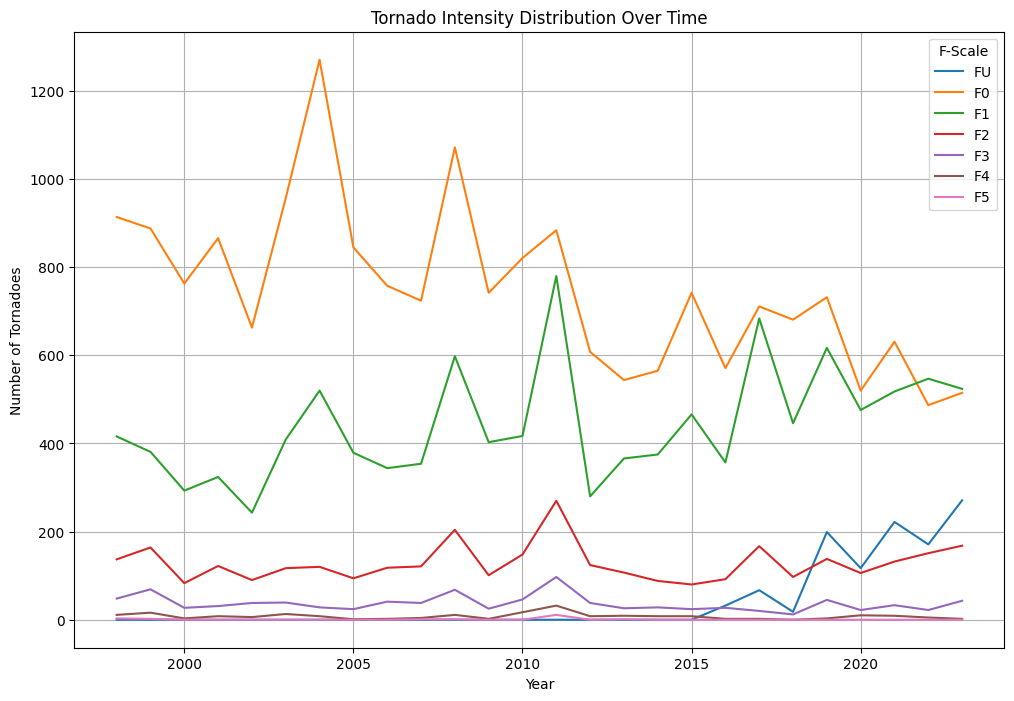

In [10]:
f_scale_count = df.groupby(['YEAR', 'F_SCALE_SIMPLE']).size().unstack(fill_value=0)
f_scale_count.plot(kind='line', figsize=(12, 8))
plt.title('Tornado Intensity Distribution Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Tornadoes')
plt.legend(title='F-Scale')
plt.grid(True)
plt.show()


In [29]:
import pandas as pd
import scipy.stats as stats

states_of_interest = ['TEXAS', 'MISSISSIPPI', 'OKLAHOMA', 'KANSAS']
years_of_interest = [1999, 2007, 2015, 2023]

state_tornadoes = df[df['STATE'].str.upper().isin(states_of_interest)]
state_tornadoes = state_tornadoes[state_tornadoes['YEAR'].isin(years_of_interest)]

contingency_table = state_tornadoes.groupby(['STATE', 'YEAR']).size().unstack(fill_value=0)

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p}")
print("Expected frequencies:")
print(expected)

alpha = 0.05
if p < alpha:
    print("The differences in tornado occurrences across states and years are statistically significant .")
else:
    print("The differences in tornado occurrences across states and years are not statistically significant .")


Chi-square statistic: 189.0236864849154
Degrees of freedom: 9
P-value: 6.58862011161003e-36
Expected frequencies:
[[107.82227098 109.20460779 135.0082282   67.96489303]
 [ 56.47833242  57.2024136   70.71859572  35.60065826]
 [114.75370269 116.224904   143.68732858  72.33406473]
 [188.94569391 191.3680746  236.5858475  119.10038398]]
The differences in tornado occurrences across states and years are statistically significant .
